# **Estimating Solubility of Molecules**

##**Loading Data**

In [8]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


##**Data Preparation**

###Data separation as X and Y

In [9]:
y = df["logS"]
y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [10]:
x = df.drop('logS',axis = 1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


###Data splitting as Training and Testing sets

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=100)

In [14]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((915, 4), (229, 4), (915,), (229,))

##**Model Building**

###**Linear Regression**

####Training the model

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

####Applying the model to make predictions

In [19]:
lr_y_pred = lr.predict(x_test)

####Evaluating the model performance

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
lr_mse = mean_squared_error(y_test,lr_y_pred)
lr_r2 = r2_score(y_test,lr_y_pred)

In [22]:
print("lr MSE (test): ",lr_mse)
print("lr R2 Score (test): ",lr_r2)

lr MSE (test):  1.0206953660861033
lr R2 Score (test):  0.7891616188563282


In [26]:
lr_result = pd.DataFrame(['Linear regression',lr_mse,lr_r2]).transpose()
lr_result.columns = ['Method','Mean squared error','R2 score']
lr_result

,Method,Mean squared error,R2 score
0,Linear regression,1.020695,0.789162


###**Random Forest**

####Training the model

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

####Applying the model to make predictions

In [29]:
rf_y_pred = rf.predict(x_test)

####Evaluating the model performance

In [30]:
rf_mse = mean_squared_error(y_test,rf_y_pred)
rf_r2 = r2_score(y_test,rf_y_pred)

In [31]:
print("rf MSE (test): ",rf_mse)
print("rf R2 Score (test): ",rf_r2)

rf MSE (test):  1.407688264904896
rf R2 Score (test):  0.7092230211002489


In [32]:
rf_result = pd.DataFrame(['Random Forest',rf_mse,rf_r2]).transpose()
rf_result.columns = ['Method','Mean squared error','R2 score']
rf_result

,Method,Mean squared error,R2 score
0,Random Forest,1.407688,0.709223


##**Model Comparison**

In [35]:
df_models = pd.concat([lr_result,rf_result],axis = 0)
df_models.reset_index(drop = True)

,Method,Mean squared error,R2 score
0,Linear regression,1.020695,0.789162
1,Random Forest,1.407688,0.709223


##**Data Visualization of prediction results**

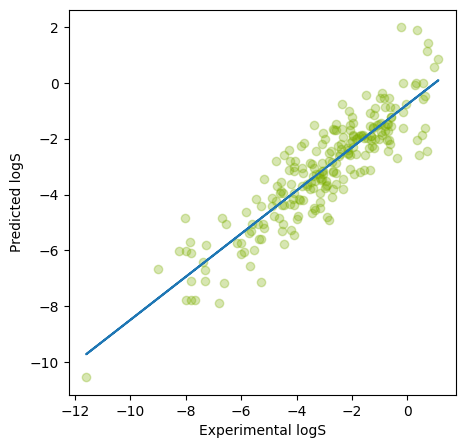

In [40]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (5,5))
plt.scatter(x = y_test,y = lr_y_pred,c = "#7CAE00",alpha = 0.3)

z = np.polyfit(y_test,lr_y_pred,1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test))
plt.ylabel("Predicted logS")
plt.xlabel("Experimental logS")
plt.show()